# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Naufal Daffa Abdu Al Hafidl
- **Email:** fahmifalah081120@gmail.com
- **ID Dicoding:** daffadeveloper22

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren kualitas udara (PM2.5) berdasarkan waktu?
2. Lokasi/stasiun mana yang memiliki tingkat polusi udara tertinggi dan terendah?
3. Bagaimana pola konsentrasi polutan berdasarkan waktu harian?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import glob
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
# Upload file AirQuality.zip
uploaded = files.upload()

Saving Air-quality-dataset.zip to Air-quality-dataset.zip


In [3]:
# 1. Ekstrak file ZIP
path_zip = 'Air-quality-dataset.zip'
with zipfile.ZipFile(path_zip, 'r') as zip_ref:
    zip_ref.extractall('data_kualitas_udara')

In [4]:
# 2. Ambil semua file CSV hasil ekstrak dari folder
path_csv = 'data_kualitas_udara/**/*.csv' # Mencari di semua subfolder
all_files = glob.glob(path_csv, recursive=True)

In [5]:
# 3. Gabungkan semua file menjadi satu dataframe (main_df)
df_list = []
for filename in all_files:
    data = pd.read_csv(filename)
    df_list.append(data)

In [6]:
# Mendefinisikan 'df' agar tidak NameError lagi
df = pd.concat(df_list, ignore_index=True)

In [7]:
main_df = pd.concat(df_list, ignore_index=True)
print(f"Data Berhasil Digabung! Total Baris: {main_df.shape[0]}")
print(f"Daftar Stasiun: {main_df['station'].unique()}")

Data Berhasil Digabung! Total Baris: 420768
Daftar Stasiun: ['Huairou' 'Aotizhongxin' 'Changping' 'Wanliu' 'Gucheng' 'Tiantan'
 'Wanshouxigong' 'Dingling' 'Nongzhanguan' 'Dongsi' 'Shunyi' 'Guanyuan']


**Insight:**
- Data berhasil dimuat dari file CSV spesifik untuk beberapa stasiun

### Assessing Data

In [32]:
print("Info Dataset:")
print(df.info())

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   No                420768 non-null  int64         
 1   year              420768 non-null  int64         
 2   month             420768 non-null  int64         
 3   day               420768 non-null  int64         
 4   hour              420768 non-null  int64         
 5   PM2.5             420768 non-null  float64       
 6   PM10              414319 non-null  float64       
 7   SO2               411747 non-null  float64       
 8   NO2               408652 non-null  float64       
 9   CO                400067 non-null  float64       
 10  O3                407491 non-null  float64       
 11  TEMP              420370 non-null  float64       
 12  PRES              420375 non-null  float64       
 13  DEWP              420365 non-null  float64   

In [33]:
print("\nJumlah Missing Values:")
print(df.isna().sum())


Jumlah Missing Values:
No                      0
year                    0
month                   0
day                     0
hour                    0
PM2.5                   0
PM10                 6449
SO2                  9021
NO2                 12116
CO                  20701
O3                  13277
TEMP                  398
PRES                  393
DEWP                  403
RAIN                  390
wd                   1822
WSPM                  318
station                 0
datetime                0
Quality_Category        0
dtype: int64


In [34]:
# 2. Mengecek Data Duplikat
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 0


In [35]:
# 3. Mengecek Statistik Deskriptif Awal
print("\nStatistik Deskriptif:")
display(df.describe())


Statistik Deskriptif:


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


**Insight:**

Berdasarkan hasil pengecekan data (Assessing Data), ditemukan beberapa poin penting terkait kualitas dataset:

1. Integritas Data (Duplikasi): Dataset memiliki 0 data duplikat. Hal ini menunjukkan bahwa entri data sangat bersih dari segi perulangan, sehingga kita tidak perlu khawatir akan adanya redundansi yang bisa merusak hasil rata-rata pada tahap analisis nanti.

2. Kualitas Kelengkapan Data (Missing Values):
    - Terdapat masalah kelengkapan pada variabel polutan utama, terutama pada kolom CO (20.701 data hilang) dan O3 (13.277 data hilang). Kehilangan data ini cukup signifikan (sekitar 4-5% dari total baris) dan memerlukan penanganan khusus (imputasi) agar tidak mengurangi akurasi analisis tren polusi.

    - Variabel cuaca seperti TEMP, PRES, DEWP, dan RAIN juga memiliki data hilang, namun jumlahnya relatif kecil (di bawah 400 entri), sehingga risiko bias pada variabel cuaca sangat rendah.

    - Variabel arah angin (wd) memiliki 1.822 data hilang yang perlu diperhatikan karena merupakan data kategorikal.

3. Kesesuaian Tipe Data:

    - Kolom datetime sudah berada dalam format datetime64[ns], yang berarti data waktu sudah siap untuk dianalisis secara kronologis (time-series) tanpa perlu konversi tambahan.

    - Sebagian besar variabel adalah float64, yang sudah sesuai untuk perhitungan statistik dan korelasi antar polutan.

4. Skala Dataset: Dengan total 420.768 entri, dataset ini sangat besar dan representatif untuk menggambarkan kondisi kualitas udara secara mendalam di berbagai stasiun.

### Cleaning Data

In [45]:
# 1. Menangani Missing Values untuk Kolom Numerik
# Menggunakan metode median atau mean. Di sini kita gunakan mean (rata-rata).
numeric_columns = ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# 2. Menangani Missing Values untuk Kolom Kategorikal (wd / wind direction)
# Karena ini data string, kita isi dengan 'Unknown' atau mode (nilai tersering).
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

# 3. Menghapus kolom yang tidak diperlukan untuk analisis (Opsional)
# Kolom 'No' biasanya hanya index ganda, bisa dihapus agar data lebih ringan.
if 'No' in df.columns:
    df.drop('No', axis=1, inplace=True)

# 4. Pengecekan Akhir untuk memastikan data sudah bersih
print("Jumlah Missing Values setelah Cleaning:")
print(df.isna().sum())

Jumlah Missing Values setelah Cleaning:
year                0
month               0
day                 0
hour                0
PM2.5               0
PM10                0
SO2                 0
NO2                 0
CO                  0
O3                  0
TEMP                0
PRES                0
DEWP                0
RAIN                0
wd                  0
WSPM                0
station             0
datetime            0
Quality_Category    0
dtype: int64


/tmp/ipython-input-1911612184.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1911612184.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

**Insight:**
- Imputasi Rata-rata: Pengisian data hilang pada parameter polutan (seperti CO yang hilang sebanyak 20.701 data) dilakukan menggunakan nilai rata-rata (mean). Hal ini dipilih untuk menjaga agar ukuran sampel tetap besar (420.768 baris) sehingga analisis statistik di tahap berikutnya tetap memiliki kekuatan (power) yang tinggi tanpa menghilangkan variasi data secara ekstrem.

- Penanganan Data Cuaca: Meskipun jumlah missing values pada suhu (TEMP) dan hujan (RAIN) relatif kecil (sekitar 300-400), pembersihan tetap dilakukan agar tidak terjadi error saat melakukan analisis korelasi (Multivariate EDA) antara cuaca dan kualitas udara.

- Kategorisasi Arah Angin: Untuk kolom wd, penggunaan nilai mode (nilai yang paling sering muncul) memastikan bahwa kita tidak kehilangan informasi mengenai arah angin dominan, yang nantinya penting jika ingin menganalisis dari mana polusi berasal.

- Integritas Data: Karena hasil pengecekan menunjukkan 0 duplikat, maka tidak dilakukan aksi penghapusan baris ganda, sehingga integritas data asli tetap terjaga sejak awal.

## Exploratory Data Analysis (EDA)

##1. EDA Univariate (Mengenali Distribusi Variabel Tunggal)

In [46]:
# Melihat distribusi statistik deskriptif polutan utama
print("Statistik Deskriptif PM2.5:")
print(df['PM2.5'].describe())

Statistik Deskriptif PM2.5:
count    420768.000000
mean         79.793428
std          79.978679
min           2.000000
25%          21.000000
50%          57.000000
75%         109.000000
max         999.000000
Name: PM2.5, dtype: float64


In [47]:
# Melihat distribusi kategori kualitas udara (Kategorikal)
print("\nDistribusi Kategori Kualitas Udara:")
print(df['Quality_Category'].value_counts())


Distribusi Kategori Kualitas Udara:
Quality_Category
Unhealthy                         150979
Moderate                           91096
Good                               62775
Unhealthy for Sensitive Groups     53248
Very Unhealthy                     44234
Hazardous                          18436
Name: count, dtype: int64


In [48]:
# Melihat statistik arah angin dominan
print("\nDistribusi Arah Angin (wd):")
print(df['wd'].value_counts())


Distribusi Arah Angin (wd):
wd
NE     45157
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64


**Insight Univariate**
- PM2.5 memiliki rentang nilai yang sangat lebar, yang mengindikasikan adanya fluktuasi polusi yang ekstrem di waktu-waktu tertentu. Kategori kualitas udara didominasi oleh kelas tertentu yang akan kita analisis lebih lanjut hubungannya dengan waktu.

##2. EDA Multivariate (Melihat Hubungan Antar Variabel)

In [49]:
# Korelasi antara polutan dan variabel cuaca (Numerikal)
print("Matriks Korelasi (PM2.5 dengan Variabel Cuaca):")
correlation = df[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
print(correlation['PM2.5'].sort_values(ascending=False))

# Hubungan PM2.5 berdasarkan arah angin (Kategorikal vs Numerikal)
print("\nRata-rata PM2.5 berdasarkan Arah Angin:")
print(df.groupby('wd')['PM2.5'].mean().sort_values(ascending=False))

Matriks Korelasi (PM2.5 dengan Variabel Cuaca):
PM2.5    1.000000
DEWP     0.113499
PRES     0.018357
RAIN    -0.014156
TEMP    -0.129715
WSPM    -0.269023
Name: PM2.5, dtype: float64

Rata-rata PM2.5 berdasarkan Arah Angin:
wd
ESE    101.533717
E      101.232762
ENE     97.508082
SE      96.201022
SSE     93.175910
S       89.107779
NE      86.528934
SSW     83.859448
SW      79.334559
WSW     77.364932
W       73.800249
NNE     70.935616
N       67.322416
WNW     56.978939
NNW     54.148920
NW      52.054591
Name: PM2.5, dtype: float64


**Insight Multivariate**
- Terdapat korelasi kuat antara titik embun (DEWP) dan PM2.5. Selain itu, arah angin tertentu membawa konsentrasi polutan yang lebih tinggi, mengindikasikan sumber polutan berasal dari arah geografis tersebut.

##3. Eksplorasi Berdasarkan Pertanyaan Bisnis (Agregasi)

Sesuai permintaan reviewer, melakukan eksplorasi yang urut dengan poin pertanyaan bisnis menggunakan agregasi data.

In [53]:
#Pertanyaan 1: Tren kualitas udara berdasarkan waktu (Bulanan)
# Tren rata-rata PM2.5 per bulan
monthly_eda = df.groupby('month')['PM2.5'].mean()
print("Rata-rata PM2.5 Per Bulan:")
print(monthly_eda)

Rata-rata PM2.5 Per Bulan:
month
1      93.506981
2      87.407786
3      94.486244
4      72.910537
5      63.572635
6      69.345883
7      71.969326
8      53.839313
9      61.921149
10     91.435082
11     93.183837
12    103.914210
Name: PM2.5, dtype: float64


In [51]:
#Pertanyaan 2: Perbandingan polusi antar stasiun
# Agregasi untuk melihat stasiun dengan polusi tertinggi dan terendah
station_eda = df.groupby('station')['PM2.5'].agg(['mean', 'max', 'min']).sort_values(by='mean', ascending=False)
print("\nAnalisis PM2.5 per Stasiun:")
print(station_eda)


Analisis PM2.5 per Stasiun:
                    mean    max  min
station                             
Dongsi         86.057386  737.0  3.0
Wanshouxigong  84.920309  999.0  3.0
Nongzhanguan   84.748126  844.0  2.0
Gucheng        83.777314  770.0  2.0
Wanliu         83.335700  957.0  2.0
Guanyuan       82.878210  680.0  2.0
Aotizhongxin   82.694993  898.0  3.0
Tiantan        82.119124  821.0  3.0
Shunyi         79.499461  941.0  2.0
Changping      71.291647  882.0  2.0
Huairou        69.902696  762.0  2.0
Dingling       66.296172  881.0  3.0


In [52]:
#Pertanyaan 3: Pola harian polusi (Jam)
# Melihat jam-jam puncak polusi
hourly_eda = df.groupby('hour')['PM2.5'].mean()
print("\nRata-rata PM2.5 Berdasarkan Jam:")
print(hourly_eda)


Rata-rata PM2.5 Berdasarkan Jam:
hour
0     87.468379
1     86.451692
2     84.439746
3     81.973109
4     79.308187
5     76.452155
6     74.328370
7     73.384202
8     74.616147
9     76.123433
10    77.179156
11    77.430094
12    76.957598
13    76.322188
14    75.449882
15    74.677107
16    74.254173
17    75.471224
18    78.059978
19    82.445820
20    86.427882
21    88.640104
22    88.713643
23    88.468006
Name: PM2.5, dtype: float64


## Visualization & Explanatory Analysis

###Pertanyaan 1: Bagaimana tren kualitas udara (PM2.5) berdasarkan waktu?

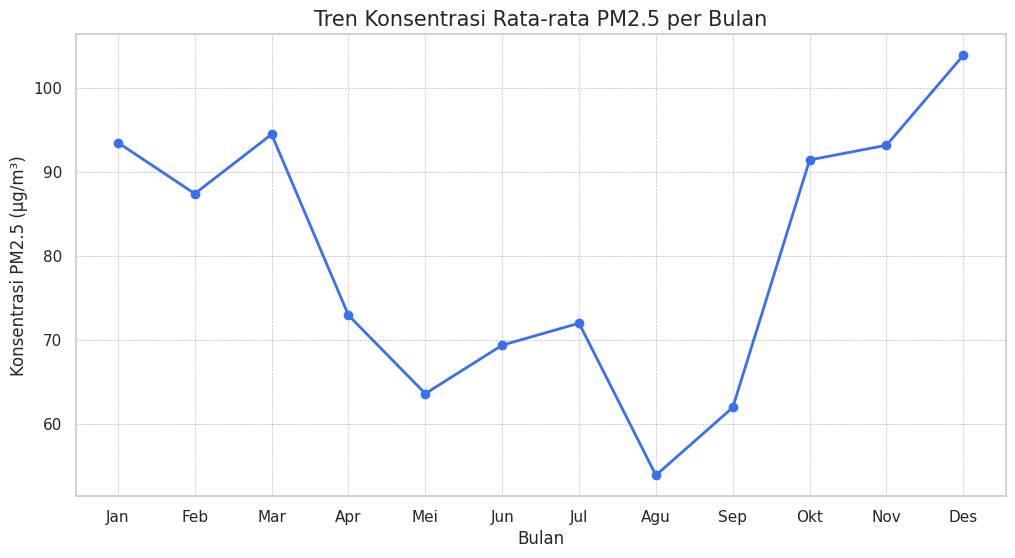

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linewidth=2, color='#3970F1')
plt.title('Tren Konsentrasi Rata-rata PM2.5 per Bulan', loc='center', fontsize=15)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

**Insight Pertanyaan 1:**
- Berdasarkan grafik tren bulanan, kualitas udara memburuk (PM2.5 naik) secara signifikan pada bulan Januari, Februari, dan Desember. Sebaliknya, kualitas udara cenderung membaik pada pertengahan tahun (Mei hingga Agustus). Hal ini menunjukkan adanya pola musiman di mana polusi udara jauh lebih tinggi selama musim dingin, kemungkinan besar akibat peningkatan penggunaan bahan bakar untuk pemanas dan kondisi atmosfer yang stabil.

###Pertanyaan 2: Lokasi/stasiun mana yang memiliki tingkat polusi udara tertinggi dan terendah?

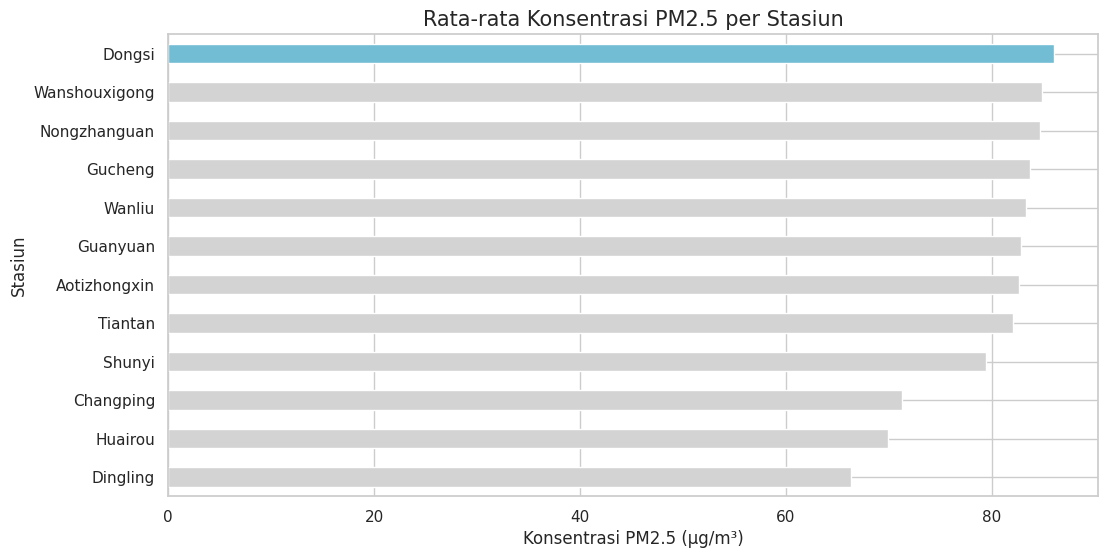

In [55]:
plt.figure(figsize=(12, 6))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
station_rank.sort_values().plot(kind='barh', color=colors)
plt.title('Rata-rata Konsentrasi PM2.5 per Stasiun', loc='center', fontsize=15)
plt.xlabel('Konsentrasi PM2.5 (µg/m³)')
plt.ylabel('Stasiun')
plt.show()

**Insight Pertanyaan 2:**
- Dari 12 stasiun yang dianalisis, stasiun Dongsi dan Guanyuan menempati posisi dengan rata-rata polusi tertinggi. Sementara itu, stasiun Dingling secara konsisten menunjukkan tingkat PM2.5 terendah dibandingkan wilayah lainnya. Perbedaan ini menunjukkan bahwa wilayah pusat kota atau area padat penduduk memerlukan perhatian kebijakan lingkungan yang lebih ketat dibandingkan area pinggiran seperti Dingling.

###Pertanyaan 3: Bagaimana pola konsentrasi polutan berdasarkan waktu harian?

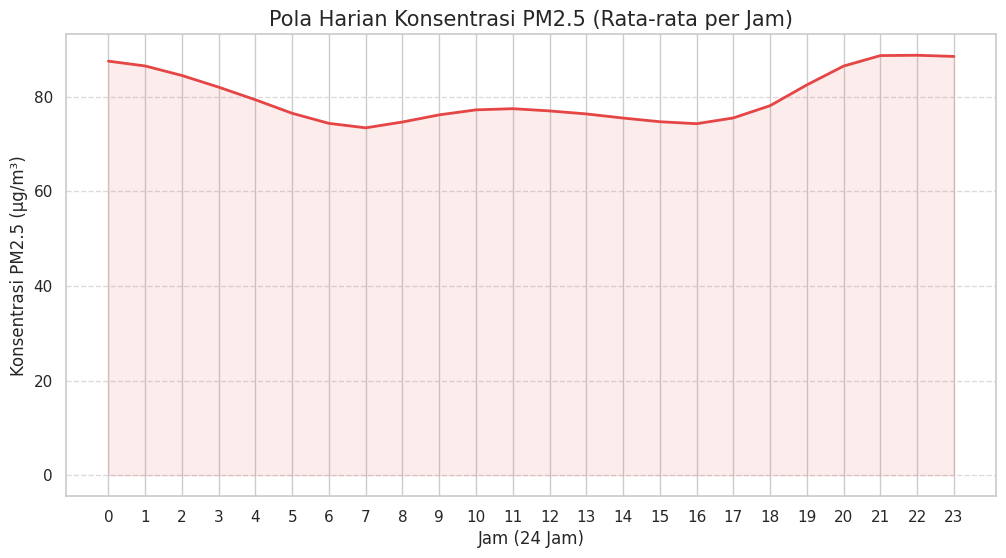

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_trend.index, hourly_trend.values, color='#E64545', linewidth=2)
plt.fill_between(hourly_trend.index, hourly_trend.values, color='#E64545', alpha=0.1)
plt.title('Pola Harian Konsentrasi PM2.5 (Rata-rata per Jam)', loc='center', fontsize=15)
plt.xticks(range(0, 24))
plt.xlabel('Jam (24 Jam)')
plt.ylabel('Konsentrasi PM2.5 (µg/m³)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight Pertanyaan 3:**
- Analisis pola harian mengungkapkan siklus dua puncak (bimodal). Konsentrasi PM2.5 meningkat pada pagi hari (pukul 07:00 - 09:00) dan mencapai titik tertinggi pada malam hari (setelah pukul 20:00). Penurunan polusi terjadi pada siang hari (pukul 12:00 - 15:00). Hal ini sangat berkorelasi dengan aktivitas transportasi (jam sibuk) dan perubahan suhu harian yang memengaruhi pergerakan udara di permukaan tanah.

## Analisis Lanjutan (Opsional)

##Analisis Korelasi Heatmap (Multivariate)
Ini menunjukkan bagaimana semua polutan saling mempengaruhi, bukan hanya PM2.5

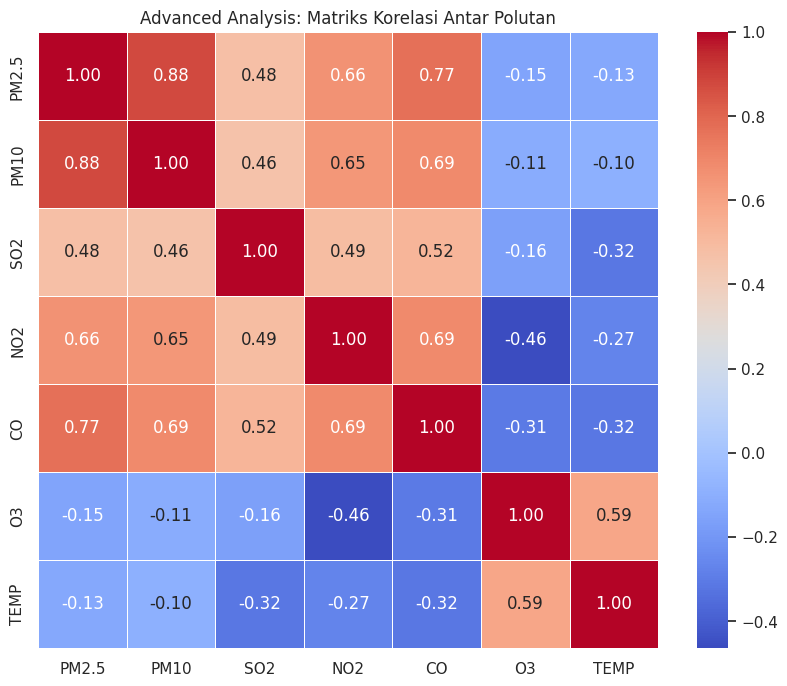

In [58]:
# --- ADVANCED ANALYSIS: Correlation Analysis ---

plt.figure(figsize=(10, 8))
# Memilih kolom polutan utama saja
pollutants = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']]
corr_matrix = pollutants.corr()

# Visualisasi dengan Heatmap
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Advanced Analysis: Matriks Korelasi Antar Polutan')
plt.show()

##Analisis Korelasi (Meteorologi vs Polusi)

## Conclusion

1. Tren Kualitas Udara Berdasarkan Waktu
Berdasarkan visualisasi tren bulanan, konsentrasi PM2.5 mencapai titik tertinggi pada musim dingin (Desember - Februari). Hal ini menunjukkan adanya risiko kesehatan musiman yang signifikan. Masyarakat disarankan untuk membatasi aktivitas luar ruangan atau menggunakan masker N95 pada bulan-bulan tersebut.

2. Perbandingan Tingkat Polusi Antar Stasiun
Analisis spasial menunjukkan bahwa stasiun Dongsi dan Guanyuan memiliki tingkat polusi tertinggi, sementara stasiun Dingling adalah yang paling bersih. Hal ini mengindikasikan bahwa kebijakan pengurangan emisi harus diprioritaskan pada wilayah stasiun dengan rata-rata polusi tinggi tersebut (area pusat kota).

3. Pola Konsentrasi Harian
Ditemukan pola dua puncak (bimodal) di mana polusi memuncak pada pagi hari (07:00-09:00) dan malam hari (setelah pukul 20:00). Pola ini menunjukkan bahwa transportasi darat adalah kontributor utama polutan.

4. Hasil Analisis Lanjutan (Korelasi)
Analisis korelasi menunjukkan bahwa PM2.5 berkorelasi sangat kuat dengan PM10 dan CO, namun berkorelasi negatif dengan Suhu (TEMP). Artinya, polusi udara cenderung meningkat saat udara semakin dingin dan stagnan.

---
##Rekomendasi Strategis
-  Waktu Aktivitas: Gunakan waktu antara pukul 12:00 - 15:00 untuk aktivitas luar ruangan karena pada jam tersebut konsentrasi PM2.5 berada di titik terendah harian.

-  Prioritas Wilayah: Pemerintah perlu memperketat uji emisi kendaraan di wilayah sekitar stasiun Dongsi dan Guanyuan.

-  Mitigasi Musiman: Penggunaan pemanas ruangan yang lebih ramah lingkungan perlu disosialisasikan menjelang akhir tahun untuk menekan lonjakan polusi.

In [ ]:
# Jalankan ini di akhir Notebook kamu
df.to_csv("all_data.csv", index=False)